# Yelp Data Challenge - NLP

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/2016_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-07-13,0,GN7KnAaxJDrYgfJzgsvmkA,5,We decided to give Delmonico's a try because w...,0,C6kw0Rny7jZAGjTj0MWA3Q
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-04-01,0,i7xD3FY-EaF9O08QL69l5w,5,Absolutely impressed with this restaurant. The...,0,tTifjrXlRrUme-4c0UW9Bw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-10-15,0,ZqMUHOJg9lGOmfqQ7RXj7A,1,This was supposed to be a very special dinner ...,0,kOll36Me-rM9NsqoDnejKA


### Define feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = [t for i,t in enumerate(df.text)]

In [5]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
len(documents)

178080

### Define the target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

/Users/jessie/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


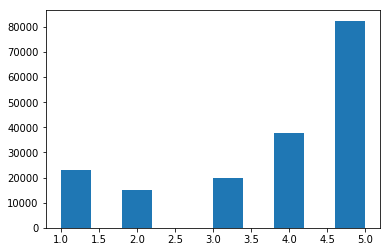

In [6]:
# Make a column and take the values, save to a variable named "target"
df.target = df.stars

plt.hist(df.target)
plt.show()

## Let's create training dataset and test dataset

In [7]:
# df.target = df.stars.apply(lambda x: 1 if x > 4 else 0)
# df.target.describe()

In [8]:
from sklearn.cross_validation import train_test_split

/Users/jessie/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(
     documents, df.stars, test_size=0.33, random_state=42)

## Let's get NLP representation of the documents

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=5000)

In [12]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train)

In [13]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [14]:
# Use the trained model to transform your test data
vectors_test = vectorizer.transform(documents_test).toarray()

## Similar review search engine

In [15]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return  [labels[i] for i in np.argsort(lst)[::1][:n]] 


In [16]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
# Draw an arbitrary review from test (unseen in training) documents
doc_test = documents_test[np.random.randint(len(documents_test))]

In [22]:
# Transform the drawn review(s) to vector(s)
doc_test_vector = vectorizer.transform([doc_test]).toarray()

In [23]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(doc_test_vector, vectors_train.toarray())

In [24]:
# Let's find top 5 similar reviews
n = 2
#np.shape(similarity_scores[0])
searched_result = get_top_values(similarity_scores[0], n, documents_train)

In [25]:
print ('Our search query:')
print (doc_test)

Our search query:
I was prepared to not like Margaritaville. I figured this was going to a formulaic theme restaurant with mediocre burgers. You typically see Margaritaville's in resort areas. This time we were at the Flamingo Hotel in Las Vegas waiting to see an 8:00 show. Everybody was hungry and thirsty and our alternative was the Food Court.

We started off with drinks. While a margarita would have was the natural choice, I lighted on the specialty cocktails. Most were rum-based with fruit juices. I had my party face on so I went for the "It's Five O'clock Somewhere" cocktail. One aspect of the sweet party drinks is they go down easily. If you don't pace yourself, you'll find yourself face down again in Margaritaville.

Fortunately dinner came before that could happen!  I had the salmon with bourbon sauce. It came with rice and a generous amount of green beans. This was a good meal. The salmon was a bit dry as they left it cooking to get the bourbon sauce to caramelize but they off

In [26]:
print ('Most %s similar reviews:' % n)
print  (searched_result)

Most 2 similar reviews:
["Order the cocktail called 'the viale', it is one of the best bourbon drinks I've ever had.", 'Staff was on point, food was good, cocktails were terrible. I got some tropical cocktail with rum it only tasted like rum.']


## Classifying positive/negative review

#### Naive-Bayes Classifier

In [27]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

nbf = MultinomialNB()
nbf.fit(vectors_train.toarray(),target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
nbf_predict_test = nbf.predict(vectors_test)

In [41]:
def make_confusion_matrix_relative(confusion_matrix):
    star_category_classes = [1, 2, 3, 4, 5]
    N = list(map(lambda clazz : sum(target_test == clazz), star_category_classes))
    relative_confusion_matrix = np.empty((len(star_category_classes), len(star_category_classes)))
    
    for j in range(0, len(star_category_classes)):
        if N[j] > 0:
            relative_frequency = confusion_matrix[j, :] / float(N[j])
            relative_confusion_matrix[j, :] = relative_frequency
            
    return relative_confusion_matrix

# http://www.wenda.io/questions/4330313/heatmap-with-text-in-each-cell-with-matplotlibs-pyplot.html
# http://stackoverflow.com/questions/20520246/create-heatmap-using-pandas-timeseries
# http://sebastianraschka.com/Articles/heatmaps_in_r.html
# http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
def plot_confusion_matrix(confusion_matrix=[[]], title='CM', savefilename=''):
    rcm = make_confusion_matrix_relative(confusion_matrix)
    #plt.imshow(rcm, vmin=0, vmax=1, interpolation='nearest')
    c = plt.pcolor(rcm, edgecolors='k', linewidths=4, cmap='jet', vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.xticks(0.5 + np.arange(5), np.arange(1,6))
    plt.yticks(0.5 + np.arange(5), np.arange(1,6))

    def show_values(pc, fmt="%.2f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if sum(color[:2] > 0.3) >= 2:
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
    
    show_values(c)

    if savefilename:
        plt.savefig(savefilename, bbox_inches='tight')
    
    return plt.show()

In [30]:
# Get score for training set
nbf.score(vectors_train.toarray(),target_train)

0.6258245119978544

[[7.72460555e-01 4.48559134e-02 3.18164037e-02 3.40331204e-02
  1.16834007e-01]
 [3.87141999e-01 9.29301021e-02 1.51011416e-01 1.42399359e-01
  2.26517124e-01]
 [1.43563591e-01 2.70437336e-02 1.35682275e-01 3.05671457e-01
  3.88038943e-01]
 [2.63616213e-02 1.34578847e-03 1.24287524e-02 2.32504750e-01
  7.27359088e-01]
 [9.25857344e-03 1.85171469e-04 9.25857344e-04 3.72564995e-02
  9.52373898e-01]]


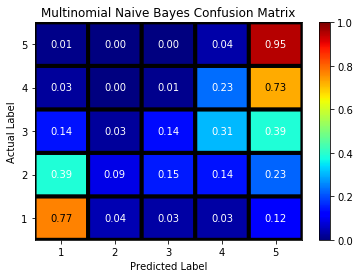

In [42]:
# Get score for test set
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
multinomial_confusion_matrix = confusion_matrix(target_test, nbf_predict_test)
print(make_confusion_matrix_relative(multinomial_confusion_matrix))
plot_confusion_matrix(multinomial_confusion_matrix, 'Multinomial Naive Bayes Confusion Matrix', savefilename='MultinomialCM.png')

#### Logistic Regression Classifier

In [43]:
# Build a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
vectors_train = vectors_train.toarray()

lg = LogisticRegression()
lg.fit(vectors_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Get score for training set
lg.score(vectors_train,target_train)

0.6988341588929957

In [45]:
# Get score for test set
lg.score(vectors_test,target_test)

0.6602174689876972

#### Q: What are the key features(words) that make the positive prediction?

In [46]:
# Let's find it out by ranking
n = 20
get_top_values(lg.coef_[0],n, words)

['worst',
 'horrible',
 'terrible',
 'poisoning',
 'zero',
 'disgusting',
 'awful',
 'waste',
 'joke',
 'sick',
 'rude',
 'worse',
 'sucks',
 'money',
 'nasty',
 'garbage',
 'poor',
 'disappointment',
 'rip',
 'shitty']

#### Q: What are the key features(words) that make the negative prediction?

In [47]:
# Let's find it out by ranking
n = 20
get_bottom_values(lg.coef_[0], n, words)

['delicious',
 'amazing',
 'great',
 'good',
 'excellent',
 'best',
 'awesome',
 'friendly',
 'loved',
 'love',
 'perfect',
 'stars',
 'favorite',
 'fantastic',
 'nice',
 'tasty',
 'enjoyed',
 'yummy',
 'attentive',
 'bit']

#### Random Forest Classifier

In [48]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 5, min_samples_leaf = 20, n_jobs = -1)
rfc.fit(vectors_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
# Get score for training set
rfc.score(vectors_train,target_train)

0.5952410885653701

[[6.25635676e-01 8.73647151e-03 2.69917851e-02 4.31607772e-02
  2.95475290e-01]
 [3.43280593e-01 2.18305628e-02 9.11275786e-02 1.39995994e-01
  4.03765271e-01]
 [1.29964457e-01 1.35991346e-02 1.01684438e-01 2.37366713e-01
  5.17385257e-01]
 [3.49905003e-02 2.21659278e-03 2.43825206e-02 1.78989867e-01
  7.59420519e-01]
 [1.30731057e-02 2.96274350e-04 3.66639508e-03 4.03673802e-02
  9.42596845e-01]]


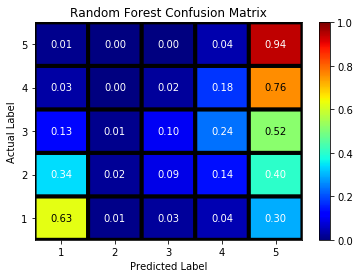

In [50]:
# Get score for test set
rfc_predict_test = rfc.predict(vectors_test)
rfc_confusion_matrix = confusion_matrix(target_test, rfc_predict_test)
print(make_confusion_matrix_relative(rfc_confusion_matrix))
plot_confusion_matrix(rfc_confusion_matrix, 'Random Forest Confusion Matrix', savefilename='rfcCM.png')

__Imbalaned Data__

1. The number of estimators may not be enough. 
2. We can see that the classifier tend to classify samples to the majority classes. We can try to downsample 5 and 1 star reviews or oversample 2,3,4 star reviews

### Important features (words) by inspecting the RFC model

In [51]:
n = 20
get_top_values(rfc.feature_importances_,n,words)

['amazing',
 'good',
 'best',
 'great',
 'worst',
 'delicious',
 'terrible',
 'told',
 'bad',
 'love',
 'ok',
 'awesome',
 'said',
 'rude',
 'wasn',
 'slow',
 'average',
 'asked',
 'perfect',
 'little']

## Use cross validation to evaluate classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfc,
                            vectors_train,
                            target_train,
                            cv = 5,
                            scoring="accuracy")
cv_scores

array([0.56541234, 0.56958471, 0.56939904, 0.57342218, 0.57308692])

## TODO: Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [ ]:
# To be implemented
